<a href="https://colab.research.google.com/github/arthurflor23/computer-vision/blob/master/HW01/HW01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Set 0

First activity of the computer vision class to review linear algebra.

To do the activity, I first imported the required python dependencies and set the *plot* method to make it easier to see the images.


In [0]:
### import dependencies
import matplotlib.pyplot as plt
import numpy as np
import urllib
import cv2

### definition of the plot method adaptable to N images
def plot(images, titles):
    size = 10*len(images)
    plt.figure(figsize=(size,size))

    for index, (image, title) in enumerate(zip(images, titles)):
        plt.subplot(1, len(images), index+1)
        plt.imshow(image, cmap="gray")
        plt.title(title + " image")
        plt.grid(False)
        
    plt.show()

## 1 Image Manipulation

(a) The provided imageManip.m script reads in the provided u2dark.png photo and converts it to grayscale using rgb2gray. 

Use the script and your own code to calculate the following statistics: 

* What is the average pixel value of the resulting grayscale image? 

* What are the min and max values?


Average: 76.96
Min: 25
Max: 153


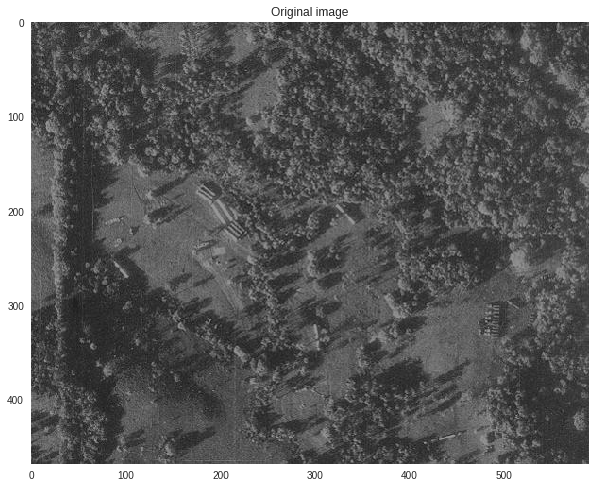

In [2]:
### get the image url from github repository
u2dark = "https://github.com/arthurflor23/computer-vision/blob/master/HW01/images/u2dark.png?raw=true"

### request to read and decode image to RGB and after to grayscale
with urllib.request.urlopen(u2dark) as url:
    image = np.asarray(bytearray(url.read()), dtype="uint8")
    image = cv2.cvtColor(cv2.imdecode(image, cv2.IMREAD_COLOR), cv2.COLOR_BGR2RGB)
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

### print results of the average, min, max
print(f"Average: {np.average(image):.2f}")
print(f"Min: {np.min(image):.0f}")
print(f"Max: {np.max(image):.0f}")

### plot original image
plot([image], ["Original"])

(b) We would like to bring the image to a more typical average brightness.

* Add an offset and apply a scaling factor to all pixels, so that the minimum pixel value becomes 0 and the max pixel value becomes 255.

* Include the final image in your report, as well as the code you used to produce it.

Average: 129.34
Min: 0
Max: 255


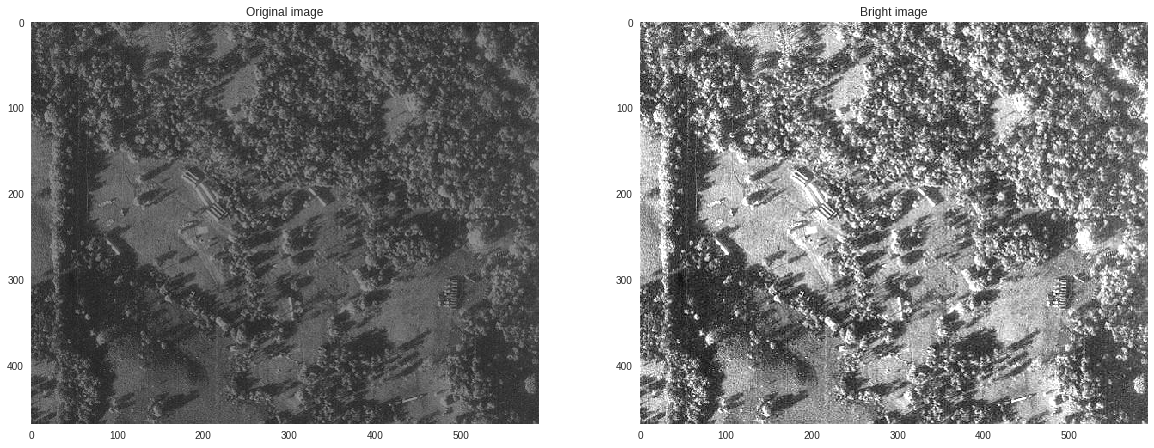

In [3]:
### subtract all pixels with the min value (to get min pixel as 0)
bright = np.subtract(gray, np.min(gray))

### multiply all pixels by 2.5x
bright = np.multiply(bright, 2.5)

### set all pixels higher 255 to 255 (avoid values above the limit range)
bright[bright > 255] = 255

### print results of the average, min, max
print(f"Average: {np.average(bright):.2f}")
print(f"Min: {np.min(bright):.0f}")
print(f"Max: {np.max(bright):.0f}")

### plot original and bright images
plot([image, bright], ["Original", "Bright"])

(c) Next, we would like to double the contrast of the pixels in the middle brightness range. Specifically, take your result from part (b) and replace each pixel‟s intensity *i* with a new intensity *i<sup>j</sup>*, where 

>   *i'* = 2 \* (*i* - 128) + 128

* Include your code and the resulting contrast-boosted image in your report. 

* Compare the image to part (b). What was the downside of increasing contrast in this way, and why did it happen?

Average: 124.16
Min: 0
Max: 255


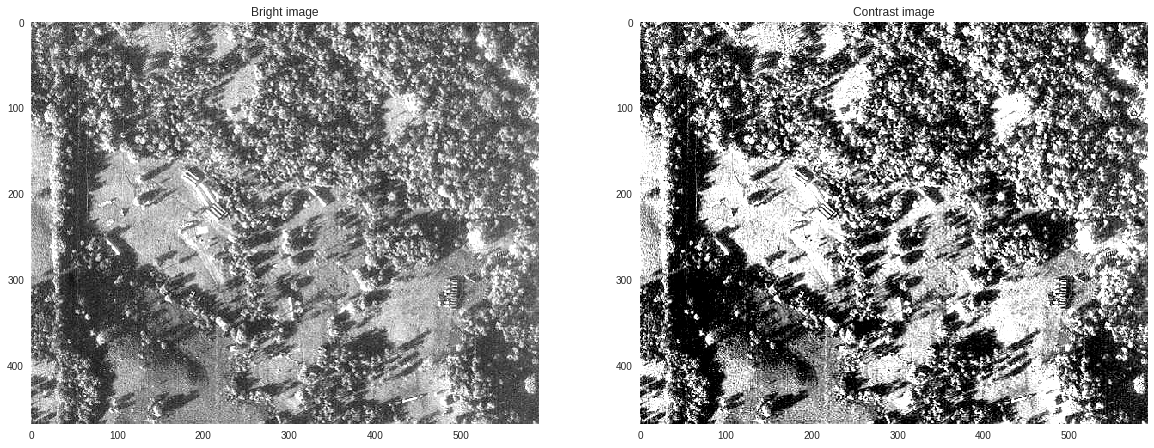

In [4]:
### apply all pixels higher 0 with the intensity function
contrast = np.where(bright>0, (2*(bright-128)+128), bright)

### sets all pixels smaller than 0 to 0
### and set all pixels higher 255 to 255 (avoid values above the limit range)
contrast[contrast < 0] = 0
contrast[contrast > 255] = 255

### print results of the average, min, max
print(f"Average: {np.average(contrast):.2f}")
print(f"Min: {np.min(contrast):.0f}")
print(f"Max: {np.max(contrast):.0f}")

### plot bright and contrast images
plot([bright, contrast], ["Bright", "Contrast"])

### the contrast image highlighted the strongest shadows and some details of the original image were lost with white

## 2 Edge Detection

An "edge" is a place where image intensity changes abruptly. Edges can indicate the borders of objects.

(a) The intensity changes associated with vertical edges can be detected by calculating for every pixel in the image:

> *horizontal gradient at a pixel ≈ (the pixel) - (pixel on its left)* 

* Open edgedetector.m and edit the DetectVerticalEdges() function to do this. Run the edgedetector() function to display your calculated gradients as an image. 

* Compare the original image to the image of gradients. Verify that the vertical edges were detected and are visible as very bright or very dark areas in the gradient image. 

* However, the gradient image also shows some tiny bright/dark spots that indicate "edges" in the water. What caused these tiny "edges"? Include your explanation and your gradient image in your report.

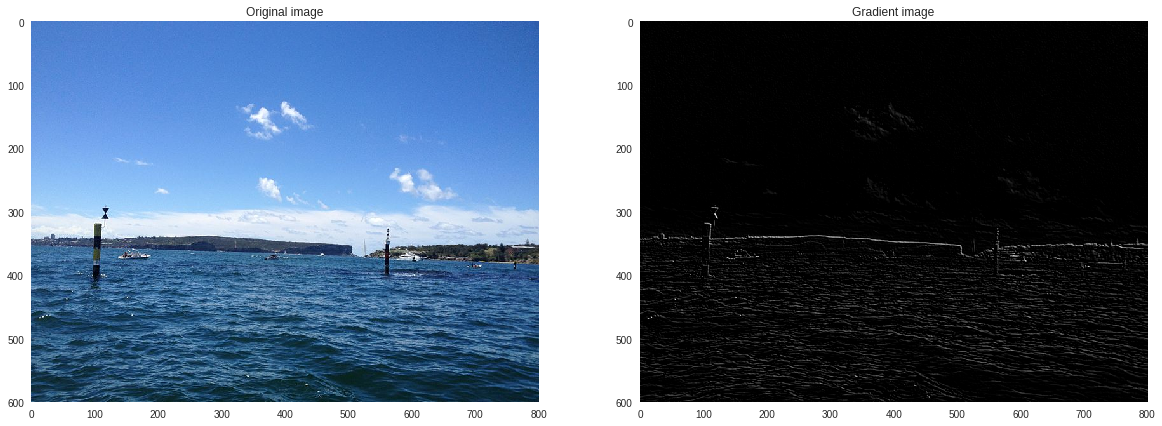

In [5]:
### get the image url from github repository
buoys = "https://github.com/arthurflor23/computer-vision/blob/master/HW01/images/buoys.jpg?raw=true"

### request to read and decode image to RGB and after to grayscale
with urllib.request.urlopen(buoys) as url:
    image = np.asarray(bytearray(url.read()), dtype="uint8")
    image = cv2.cvtColor(cv2.imdecode(image, cv2.IMREAD_COLOR), cv2.COLOR_BGR2RGB)
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

### for this question, I created the Sobel kernels to get the x and y gradients
kernel_y = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]], np.float32)
kernel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], np.float32)

### making the filter convolutional in gray image with the Sobel kernels
gradient_y = cv2.filter2D(gray, cv2.CV_32F, kernel_y)
gradient_x = cv2.filter2D(gray, cv2.CV_32F, kernel_x)

### joining the gradients and making the minimum 0
gradient = gradient_x + gradient_y
gradient[gradient < 0] = 0

### plot original and gradient images
plot([image, gradient], ["Original", "Gradient"])

### the bright/dark "edges" indicate the level of difference 
### about the intensity of the local pixels (inside window of the kernel).
### 
### the difference between sea and sky is higher than inside sea, for example.

(b) We will now assess the effects of “blurring” the gradient image. The simplest blurring operation is the box blur. In a box blur of width n, each blurred pixel is computed as follows: 

<img src="https://github.com/arthurflor23/computer-vision/blob/master/HW01/helpers/01.png?raw=true" width="325"/>

In edgedetector.m, edit the BoxBlur() function to do this, and run the edgedetector() function to view the results. 

* What was the effect of the blur on the large edges, compared to the tiny "noise" edges? Why?

* Include your explanation and your blurred edge image in your report.

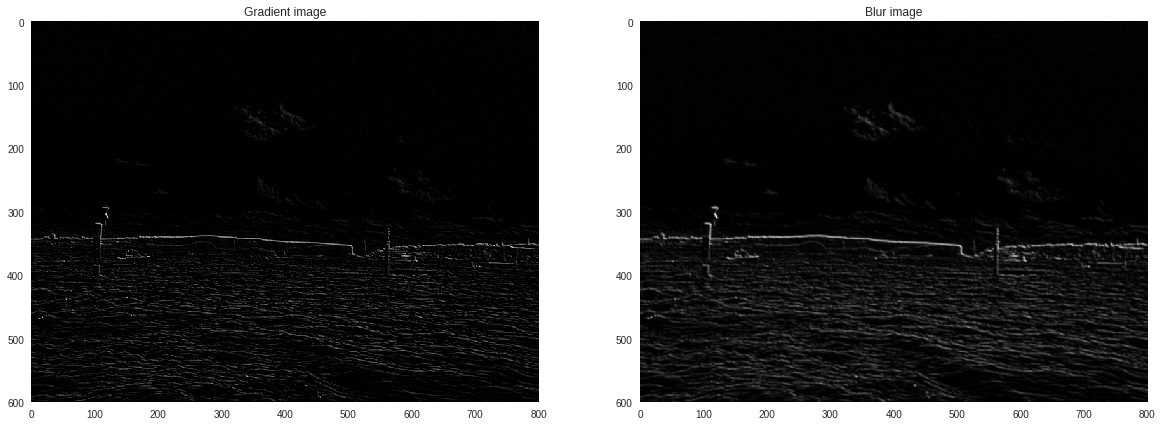

In [6]:
### making the blur effect through GaussianBlur method
blur = cv2.GaussianBlur(gradient, (7,7), 1)

### plot gradient and blur images
plot([gradient, blur], ["Gradient", "Blur"])

### the "noise" edges become softer.
### however, the large edges become more highlight and connect, making a continuing line.

## 3 Transformation Matrices

(a) Recall that transformation matrices can be used to rotate, scale, and/or skew vectors. For example, the rotation matrix

<img src="https://github.com/arthurflor23/computer-vision/blob/master/HW01/helpers/02.png?raw=true" width="200"/>

will rotate a vector 45 degrees counterclockwise (CCW). Points may be thought of as vectors from the origin, so we could equivalently say that it will rotate a point by 45 degrees CCW about the origin. For a vector

<img src="https://github.com/arthurflor23/computer-vision/blob/master/HW01/helpers/03.png?raw=true" width="100"/>

please describe (in words):

* the effect of the transformation X<sub>1</sub> = AAX<sub>0</sub>. In other words, how does X<sub>1</sub> relate to X<sub>0</sub>?

In [0]:
### the X1 is the X0 rotated, in this case, rotated 45º CCW.
### for example:
### X0 = [0, 1] and when rotated (multiplied with A), we got X1 = [1, 0]
###
### making the multiplication between X1 and the matrix counterclockwise about 45º, that is:
### A2 = [[cos0, sin0],
###      [-sin0, cos0]]
###
### we got the X0 again.

(b) 

<img src="https://github.com/arthurflor23/computer-vision/blob/master/HW01/helpers/04.png?raw=true" width="200"/>

Continue to use X<sub>0</sub> and A as defined above. 

* Design a series of matrix multiplications which will first scale a vector X<sub>0</sub> by 1.0 in the x direction and 0.5 in the y direction, and then rotate the result by 45 degrees counterclockwise, to produce a vector which we will call X<sub>2</sub>. 

* Give a formula for X<sub>2</sub> in terms of X<sub>0</sub>, the matrix A from above, and any other necessary matrices which you define.

In [0]:
### scale the vector X0 by 1 in the x direction:
### XS1 = X0 * S1, where: S1 = [[1, 0],
###                             [0, 1]]
###
### scale the vector X0 by 0.5 in the y direction:
### XS2 = XS1 * S2, where: S2 = [[1,  0 ],
###                              [0, 0.5]]
###
### So, X2 = XS2 * A, to get the 45 rotation.
###
### otherwise, X2 = X0 * S1 * S2 * A

(c) 

* Use matrix multiplication to produce a single 2x2 matrix T which will accomplish the rotating-and-scaling transformation from (b) above. In other words, give a 2x2 matrix T such that X<sub>2</sub> = T * X<sub>0</sub> , with X<sub>2</sub> as defined above. 

* You may use Python to multiply matrices. Run the script to see Python apply your transformation matrix to every pixel in the image. Include the transformed image in your report, as well as your matrix T. If the output is not what you expect, double-check your work from (b) and above.

Applied matrix:
 [[ 7.07106781e-01 -7.07106781e-01  2.98478139e+02]
 [ 7.07106781e-01  7.07106781e-01  7.90770386e-02]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]]


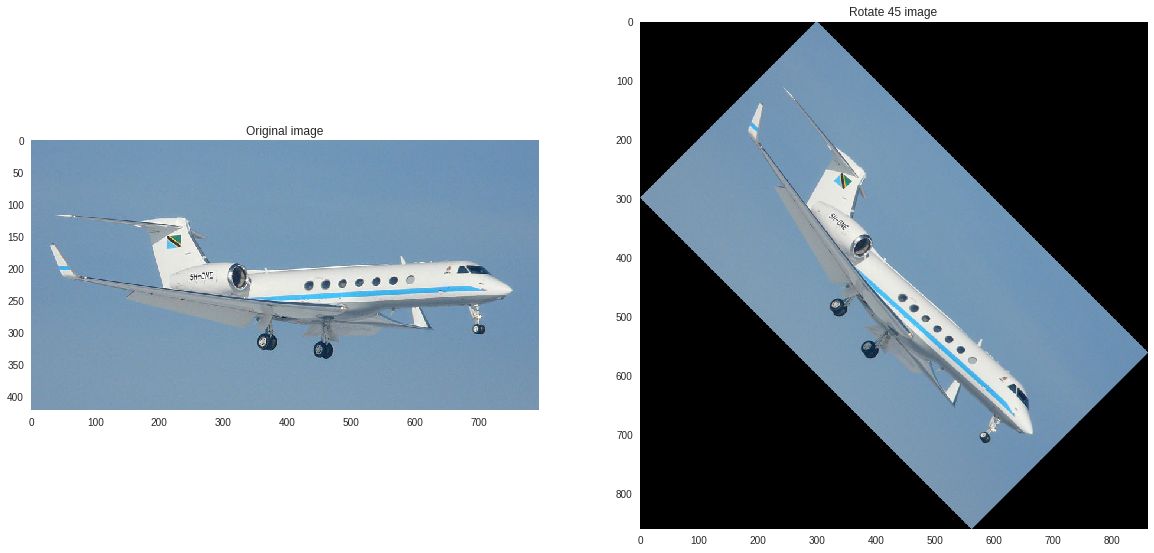

In [9]:
### I used the warpAffine method to apply a geometric transformation, 
### in this question was rotation and translation. 
### the rotation matrix applies the transformation at the point (0, 0) and the new rotated image would be clipped, 
### so I applied a translation on the X axis of 298 to "center" the new rotated image, or use the getRotationMatrix2D method.
### I couldn't use a single 2x2 array to scale and rotate the image.
### so, I applied only rotation and translation with 3x3 matrix, where Z is const by 1

### get the image url from github repository
gulfstream = "https://github.com/arthurflor23/computer-vision/blob/master/HW01/images/gulfstream.png?raw=true"

### request to read and decode image to RGB
with urllib.request.urlopen(gulfstream) as url:
    image = np.asarray(bytearray(url.read()), dtype="uint8")
    image = cv2.cvtColor(cv2.imdecode(image, cv2.IMREAD_COLOR), cv2.COLOR_BGR2RGB)

### set values to help after in the code
(h, w) = image.shape[:2]
(cX, cY) = (w//2, h//2)

### set the T matrix, with 45 rotation and 298 translation in x axis
# cos_sin_45 = np.sqrt(2)/2
# T = np.float32([[cos_sin_45, -cos_sin_45, 298],
#                 [cos_sin_45, cos_sin_45, 0],
#                 [0, 0, 1]])

### or just apply the getRotationMatrix2D method.
### it's return the 2x3 matrix (without last [0,0,1] vector), but I concatenate it just to print after
T = cv2.getRotationMatrix2D((cX, cY), -45, 1.0)
T = np.concatenate((T, [[0,0,1]]), axis=0)

### get and set the new width and height
cos, sin = np.abs(T[0,0]), np.abs(T[0,1])
nW = int((h * sin) + (w * cos))
nH = int((h * cos) + (w * sin))

T[0,2] += (nW/2) - cX
T[1,2] += (nH/2) - cY

### applying transformation and get the new image
rotate45 = cv2.warpAffine(image, T[:2], (nW, nH))

### print the matrix and plot the original and new image
print("Applied matrix:\n", T)
plot([image, rotate45], ["Original", "Rotate 45"])

(d) We will use 2D homogeneous coordinates [x, y, 1]<sup>T</sup> in this problem. 

* Build a transformation matrix T to translate a vector by +2 in the x direction (and not perform any rotation). 

* Also build a rotation matrix R to rotate a vector 90 degrees CCW. Include T and R in your report. 

Given the 2D homogeneous vector

<img src="https://github.com/arthurflor23/computer-vision/blob/master/HW01/helpers/05.png?raw=true" width="100"/>

* use Python to apply the transformation p<sub>1</sub> = T \* Rp<sub>0</sub> and p<sub>2</sub> = RT \* p<sub>0</sub>. Give the values of p<sub>1</sub> and p<sub>2</sub> and explain why they differ from each other.

Applied matrix with no rotation and 50 translation in x and y axis:
 [[ 1.  0. 50.]
 [ 0.  1. 50.]
 [ 0.  0.  1.]]


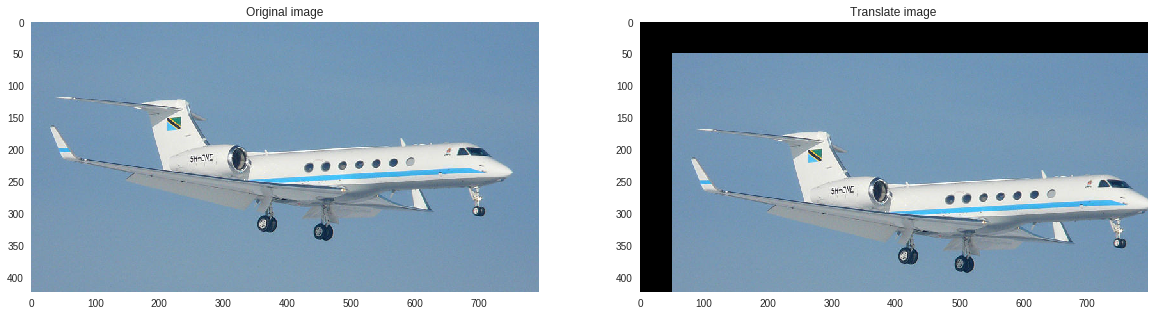


Applied matrix with 90º clockwise rotation with the translation required to center the new image:
 [[ 6.12323400e-17 -1.00000000e+00  4.22500000e+02]
 [ 1.00000000e+00  6.12323400e-17 -2.84217094e-14]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]]


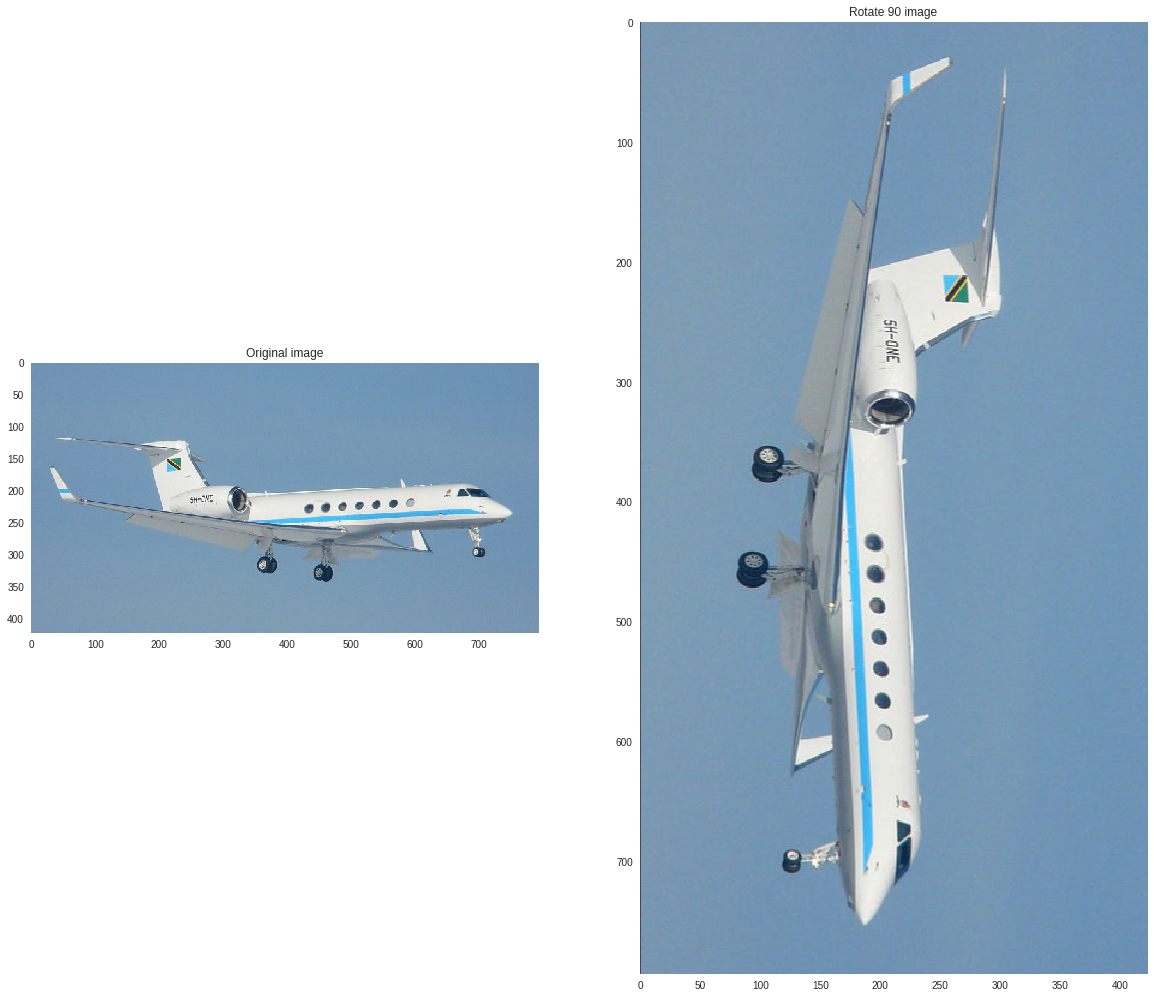

In [10]:
### set the T matrix, with no rotation and 50 translation in x and y axis
T = np.float32([[1, 0, 50],
                [0, 1, 50],
                [0, 0, 1]])

### applying transformation and get the new image
translate = cv2.warpAffine(image, T[:2], (w, h))

### print the matrix and plot the original and new image
print("Applied matrix with no rotation and 50 translation in x and y axis:\n", T)
plot([image, translate], ["Original", "Translate"])

### applying the getRotationMatrix2D method with 90º clockwise 
### and concatenate the [0,0,1] vector just to print after
R = cv2.getRotationMatrix2D((cX, cY), -90, 1.0)
R = np.concatenate((R, [[0,0,1]]), axis=0)

### get and set the new width and height
cos, sin = np.abs(R[0,0]), np.abs(R[0,1])
nW = int((h * sin) + (w * cos))
nH = int((h * cos) + (w * sin))

R[0, 2] += (nW/2) - cX
R[1, 2] += (nH/2) - cY

### applying transformation and get the new image
rotate90 = cv2.warpAffine(image, R[:2], (nW, nH))

### print the matrix and plot the original and new image
print("\nApplied matrix with 90º clockwise rotation with the translation required to center the new image:\n", R)
plot([image, rotate90], ["Original", "Rotate 90"])

(e) Assume the unknown matrix R is a rotation matrix. *Remember that for rotation matrices, the transpose of the matrix has the reverse effect, which means R<sup>T</sup> = R<sup>-1</sup>*. And this means R<sup>T</sup> \* R = I and R \* R<sup>T</sup> = I. Also, assume the unknown matrix A is invertible. 

* Use these facts to solve for Y in the matrix expression: R \* Y \* A = B

Remember, Y and B are not rotation matrices, and you can't assume anything in particular about them.



In [0]:
### isolating R * Y, we got the A inverse in side of B, then:
###    R * Y = B * A^-1
###
### to cancel the matrix R on the Y side, 
### multiply the two terms by the transpose matrix of the rotation matrix, in the case R^T:
###    R * Y * R^T = B * A^-1 * R^T
###
### So, canceling, we have:
###    Y = B * A^-1 * R^T

## 4 SVD for Image Compression

(a) In this problem, you will explore SVD compression on the flower.bmp image we have provided. In addition to your answers to each question, you should also submit your Python code and required plots where necessary.

* Use Python to read in flower.bmp and convert it to grayscale and double format. 

* Apply SVD and give the top 10 singular values. 

* Generate a plot for all singular values versus their rankings. What do you notice from this plot?

Top 10 singular values:
[44672.41488096  6623.02844327  5165.81911874  3874.68913914
  3328.36060215  3068.85205421  2852.80384389  2772.97785994
  2650.79412325  2455.25540719]


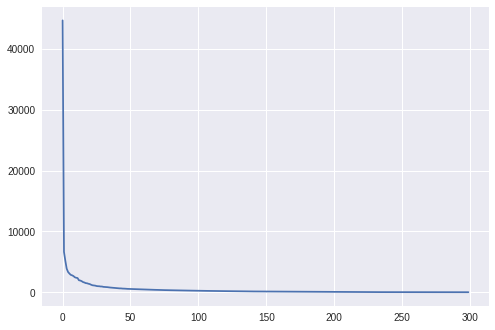

In [12]:
### import dependency
from numpy.linalg import svd

### get the image url from github repository
flower = "https://github.com/arthurflor23/computer-vision/blob/master/HW01/images/flower.bmp?raw=true"

### request to read and decode image to RGB and after to grayscale
with urllib.request.urlopen(flower) as url:
    image = np.asarray(bytearray(url.read()), dtype="uint8")
    image = cv2.cvtColor(cv2.imdecode(image, cv2.IMREAD_COLOR), cv2.COLOR_BGR2RGB)
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

### define the "svd_compress" method to make easy the compression
def svd_compress(image, k):
    ### u has left singular vectors in the columns
    ### s is rank 1 numpy array with singular values
    ### v has right singular vectors in the rows -equivalent to V^T in traditional linear algebra literature
    u,s,v = svd(image, full_matrices=False)    
    reconst_img = np.dot(u[:,:k], np.dot(np.diag(s[:k]), v[:k,:]))
        
    ### calculating the compression ratio
    compression_ratio = 100 - (100.0 * (k*(image.shape[0] + image.shape[1])+k)/(image.shape[0]*image.shape[1]))
    compression_ratio = 0 if compression_ratio < 0 else compression_ratio
    
    return reconst_img, compression_ratio, (u,s,v)
    
### call the method and get only svd values
_, _, usv = svd_compress(gray, 90)

### print the top 10 singular values
print(f"Top 10 singular values:\n{usv[1][:10]}")

### plot the all singular values versus their rankings
plt.plot(usv[1])
plt.show()

### the first ranks have the highest singular values, forming an exponential function

(b) Verify that you can reconstruct and display the image using the three SVD matrices (note that the svd command returns V , not V<sup>T</sup>). Then, perform compression by using only the top k singular values and their corresponding left / right singular vectors. 

* Let k = 10, 50, and 100. Reconstruct and print the compressed images for the three different values of k. Briefly describe what you observe.

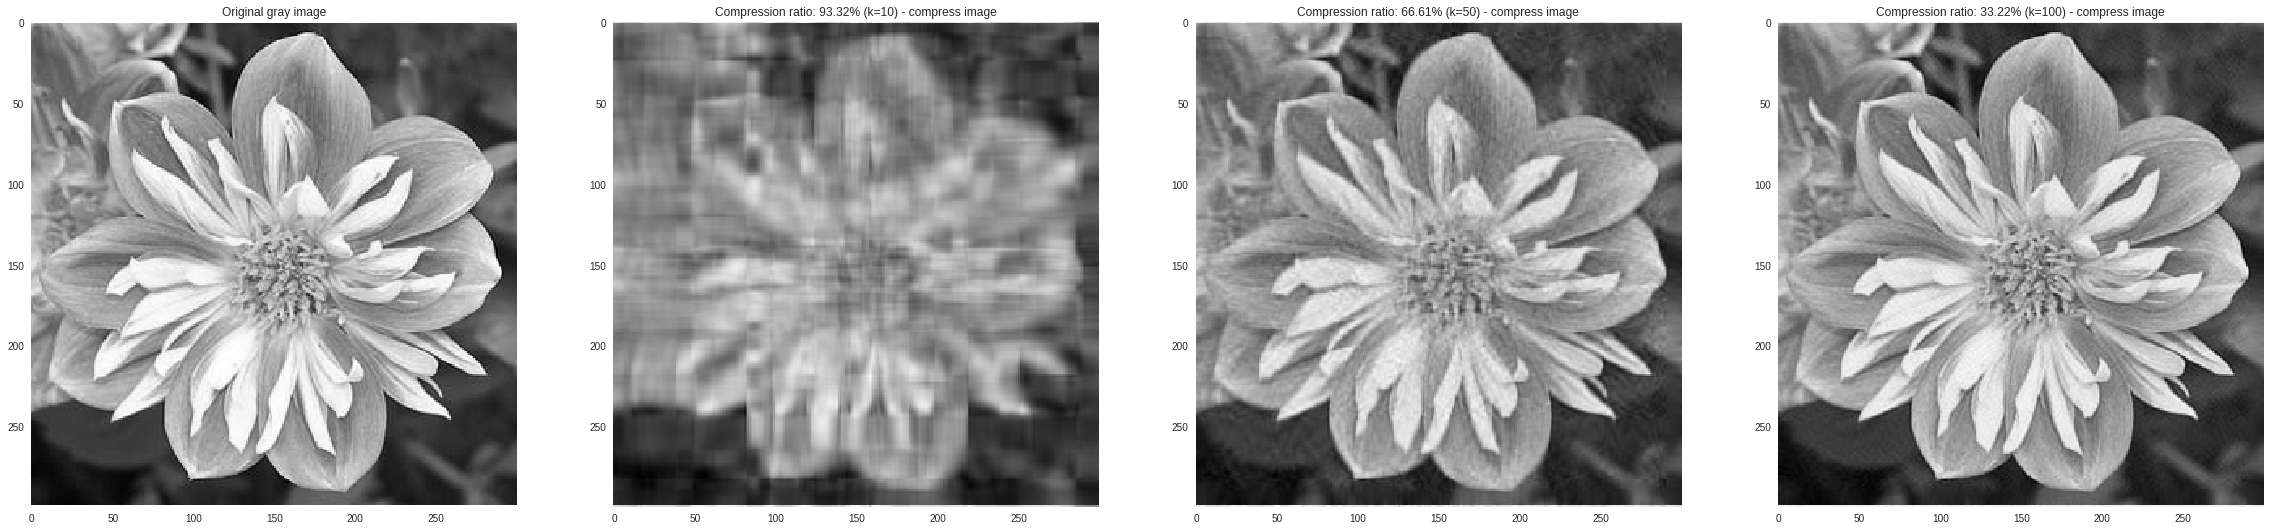

In [13]:
### get the images compressions with k = 10, 50 and 100
im10, c_ratio10, usv10 = svd_compress(gray, 10)
im50, c_ratio50, usv50 = svd_compress(gray, 50)
im100, c_ratio100, usv100 = svd_compress(gray, 100)

### create the title for images plot
title10 = f"Compression ratio: {c_ratio10:.2f}% (k=10) - compress"
title50 = f"Compression ratio: {c_ratio50:.2f}% (k=50) - compress"
title100 = f"Compression ratio: {c_ratio100:.2f}% (k=100) - compress"

### plot original image with the compressions (10, 50, 100)
plot([gray, im10, im50, im100], ["Original gray", title10, title50, title100])

### the k represents the number of values (from left, right and singular vectors) is used to reconstruct the image.
### The less values, the more the image reconstruction will be "compressed", 
### in other words, it will be using less values to represent the original image.

(c) Instead of transmitting the original (grayscale) image, you can perform SVD compression on it and transmit only the top k singular values and the corresponding left / right singular vectors. This should be much smaller than the original image for low values of k.

* With this specific image, will we still save space by compressing when k = 200? Show why or why not.

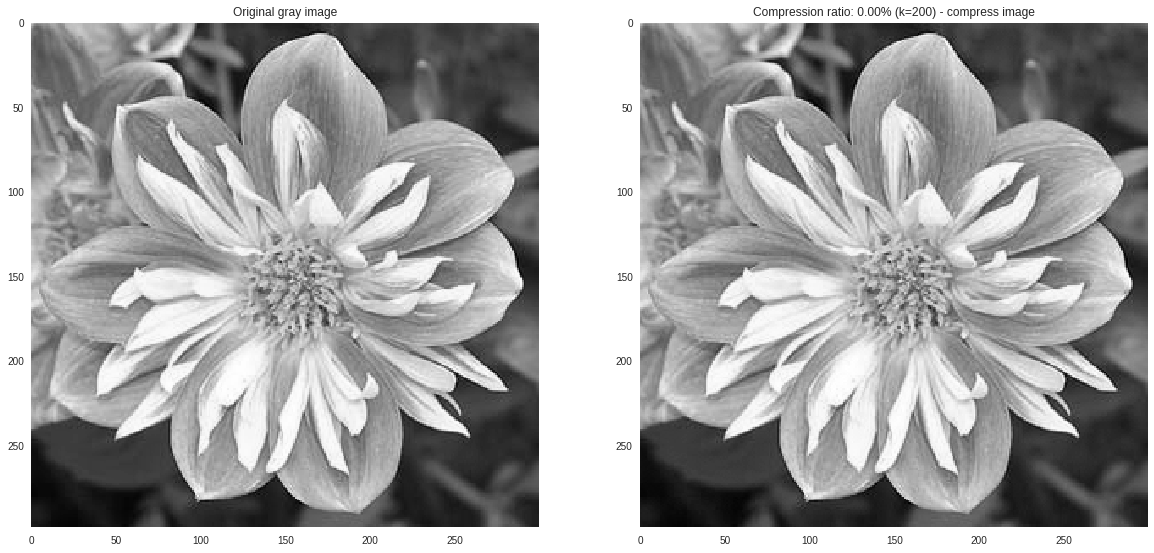

In [14]:
### get the image compression with k = 200
im200, c_ratio200, usv200 = svd_compress(gray, 200)

### create the title for image plot
title200 = f"Compression ratio: {c_ratio200:.2f}% (k=200) - compress"

### plot original image with the compressions (200)
plot([gray, im200], ["Original gray", title200])

### I couldn't compress, since the number of k takes the largest of the relevant values of the usv vectors

(d) Let e<sub>ij</sub> be the per-pixel error, i.e. the difference between the original image and the compressed version at coordinates row i and column j. Explain why this expression gives the upper bound on the per-pixel error:

<img src="https://github.com/arthurflor23/computer-vision/blob/master/HW01/helpers/06.png?raw=true" width="150"/>

where r is the rank of the original matrix (i.e., the total number of singular values), σ<sub>i</sub> is the i*th* singular value, k is defined above, and ρ is a constant that you must fill in (in other words, ρ is just a simple constant number, which you can arrive at through understanding what is being added up by the formula, and how it relates to the worst-case error). 

* For full credit, you must determine ρ and explain how the formula is calculating worst-case error.

In [15]:
### svd compression
im50, c_ratio50, usv50 = svd_compress(gray, 50)

### calculating the error values
s_sum = np.sum(usv[1])
error_per_pixel = np.sum(np.abs(np.subtract(im50, gray)))
error_per_pixel_sum = error_per_pixel/s_sum

### print values
print("Singular sum:", s_sum)
print("Error per pixel:", error_per_pixel)
print('Ratio per pixel:', error_per_pixel_sum)

Singular sum: 151600.66414115322
Error per pixel: 626109.9225172474
Ratio per pixel: 4.129994588508434


(e) Explain how you could use the formula in (d) to choose the smallest possible value of k such that the per-pixel error at any pixel is guaranteed to be no greater than ξ, for some small tolerance ξ > 0.

In [0]:
### we can define a limit number to error value and calculate compression.
### check the ratio per pixel if is higher or not of the limit number..
### will calculate a new compression (with a new k value) if necessary for a new verification.

## 5 SVD application - Matrix Norm

Similarly to vectors, we may define a norm (a magnitude measurement) for matrices. A matrix norm is any function with the following properties:

<img src="https://github.com/arthurflor23/computer-vision/blob/master/HW01/helpers/07.png?raw=true" width="450"/>

A common matrix norm is the 2-norm:

<img src="https://github.com/arthurflor23/computer-vision/blob/master/HW01/helpers/08.png?raw=true" width="250"/>

where x is a unit vector (i.e. of length 1). Here, the notation 
    
    max(expression)
    
means “the maximum value of (expression), for any value of x” and the expression sqrt(x<sup>T</sup> x) for a column vector x is another way of writing the length (you should go through the multiplication yourself to make sure you understand this fact). In other words, we can see that ||A||<sub>2</sub> measures the maximum “magnifying power” of A: the max amount A can stretch any unit vector x under multiplication.

(a) At first glance, it looks like it would be hard to calculate ||A||<sub>2</sub>. But we can prove that ||A||<sub>2</sub> = σ<sub>max</sub>, the largest singular value of A. 

* Please prove this using the properties of the Singular Value Decomposition of A. *Hint: here is one possible strategy you might follow to prove this*:

>> *Rewrite the formula for ||A||<sub>2</sub>. Using the knowledge that any matrix may be expressed as its SVD: A = U Σ V^T.*

>> *Use the properties of transpose and of rotation matrices to eliminate the U's.*

>> *Note that, for any rotation matrix R and unit vector u, Ru produces another unit vector (call it w), and u<sup>T</sup> R<sup>T</sup> produces w<sup>T</sup>. You can use this line of reasoning to eliminate V (as an alternative to this reasoning and the next step, you could skip straight to defining the unit vector which will maximize the expression you have).*

>> *At this point, you should have an expression with only Σ's and unit vectors. Using the properties of Σ, you should be able to easily state the unit vector that will maximize this expression, which will allow you to complete the proof.*

(b) Another commonly used norm is the Frobenius norm:

<img src="https://github.com/arthurflor23/computer-vision/blob/master/HW01/helpers/09.png?raw=true" width="500" height="80"/>

If we square it to eliminate the square root, the same operation can be calculated as

<img src="https://github.com/arthurflor23/computer-vision/blob/master/HW01/helpers/10.png?raw=true" width="175" height="50"/>

From class, remember that the trace of a matrix is the sum of its diagonal elements. If desired, you can verify that the above expressions match by working through yourself how the diagonal elements of A<sup>T</sup> A are calculated. Your task is to prove that:

<img src="https://github.com/arthurflor23/computer-vision/blob/master/HW01/helpers/11.png?raw=true" width="250"/>

the sum of the squares of the singular values of A. Hints:

*   Use some of the SVD properties that you used in (a).

*   One property of the trace is that it is “basis independent,” which means, if we have an invertible matrix B, trace(B<sup>-1</sup> AB) = trace(A).

*   Using the above properties, you should be able to reduce the expression to a matrix whose diagonal elements are:
    <img src="https://github.com/arthurflor23/computer-vision/blob/master/HW01/helpers/11.png?raw=true" width="250"/>